# Week4授業前課題2 住宅価格の予測

## 【問題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv("dataset/train.csv")
df = df_original[["GrLivArea", "YearBuilt", "SalePrice"]]

# 説明変数と目的変数に分割
X = df[["GrLivArea", "YearBuilt"]]
y = df[["SalePrice"]]

## 【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。  
評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [92]:
# トレーニングデータとテストデータに分割
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.25)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X_train.shape, X_test.shape

((1095, 2), (365, 2))

In [109]:
# 検証用データの学習
linear = LinearRegression()
linear.fit(X_train, y_train)

# 検証用データの推定
y_predict_linear = linear.predict(X_test)

# 平均二乗誤差による評価
mse_linear = mean_squared_error(y_test, y_predict_linear)
print("評価値：", mse_linear)

評価値： 2030017422.8732786


In [95]:
# 可視化
def plot_graph(X_test, y_test, y_predict):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.title( "GrLivArea and SalePrice")
    plt.scatter(X_test[:,0],y_test,label="test")
    plt.scatter(X_test[:,0],y_predict,label="pred")
    plt.grid()
    plt.legend()

    plt.subplot(1,2,2)
    plt.title( "YearBuilt and SalePrice")
    plt.scatter(X_test[:,1],y_test,label="test")
    plt.scatter(X_test[:,1],y_predict,label="pred")
    plt.legend()
    plt.grid()
    plt.show()

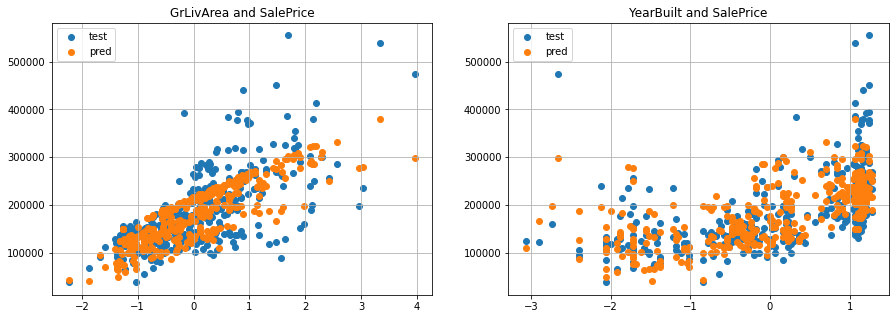

In [96]:
plot_graph(X_test, y_test, y_predict_linear)

## 【問題3】手法の比較

### SVM

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


評価値： 6601463802.803818


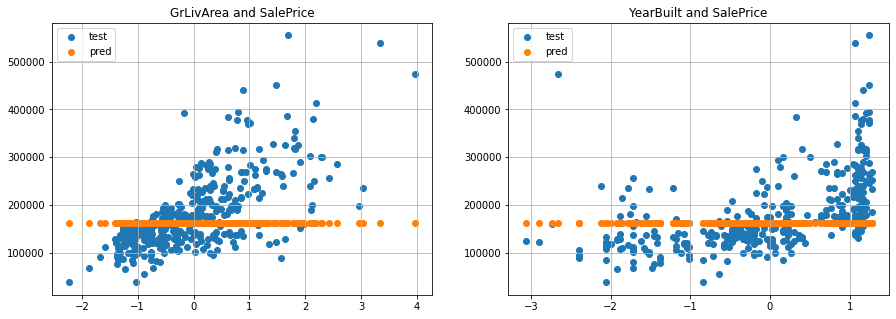

In [112]:
from sklearn.svm import SVR
svr = SVR()
# 検証用データの学習
svr.fit(X_train, y_train) 

# 検証用データの推定
y_predict_svr = svr.predict(X_test)

# 平均二乗誤差による評価
mse_svr = mean_squared_error(y_test, y_predict_svr)
print("評価値：",mse_svr)

plot_graph(X_test, y_test, y_predict_svr) # グラフを描画

### 決定木

評価値： 3224166465.8225265


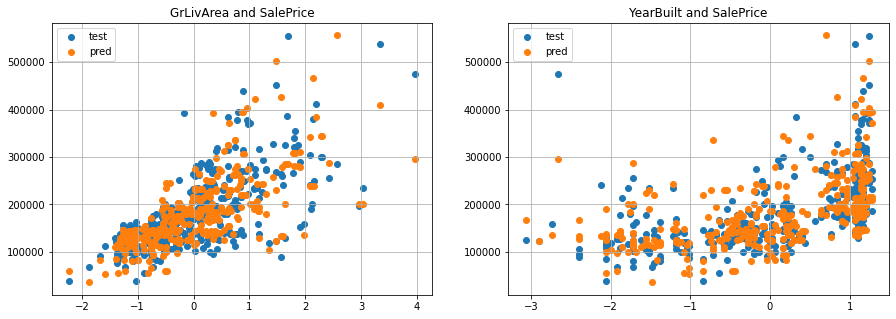

In [113]:
from sklearn.tree import DecisionTreeRegressor

# 検証用データの学習
dtr = DecisionTreeRegressor().fit(X_train, y_train)

# 検証用データの推定
y_predict_dtr = dtr.predict(X_test)

# 平均二乗誤差による評価
mse_dtr = mean_squared_error(y_test, y_predict_dtr)
print("評価値：",mse_dtr)

plot_graph(X_test, y_test, y_predict_dtr) # グラフを描画

### ランダムフォレスト

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


評価値： 2081316971.106756


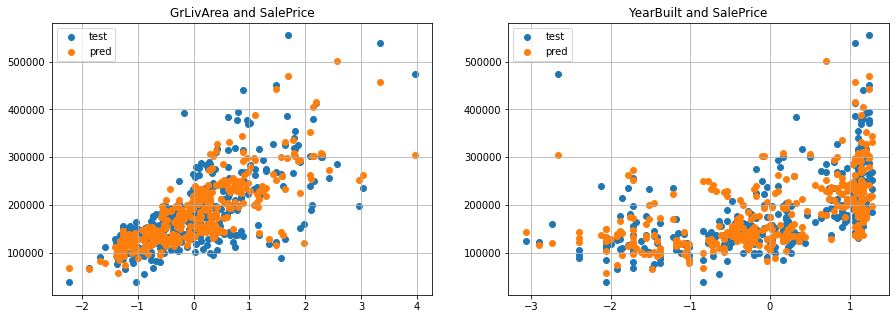

In [114]:
from sklearn.ensemble import RandomForestRegressor

# 検証用データの学習
forest = RandomForestRegressor().fit(X_train, y_train)

# 検証用データの推定
y_predict_forest = forest.predict(X_test) # 検証用データを推定させる

# 平均二乗誤差による評価
mse_forest = mean_squared_error(y_test, y_predict_forest)
print("評価値：",mse_forest)

plot_graph(X_test, y_test, y_predict_forest) # グラフを描画

In [116]:
pd.DataFrame([mse_linear, mse_svr, mse_dtr,mse_forest], columns=["MSE"], index=["LinearRegression","SVR","DecisionTreeRegressor","RandomForestRegressor"])

,MSE
LinearRegression,2.030017e+09
SVR,6.601464e+09
DecisionTreeRegressor,3.224166e+09
RandomForestRegressor,2.081317e+09


[考察]  
平均二乗誤差(MSE)によるとSVMの数値が悪く、その他の手法はあまり変わらない。